In [35]:
from room_env.utils import read_json, write_json

for room_size in ["xxs", "xs", "s", "m", "l", "xl", "xxl"]:
    room_config = read_json(f"./room_env/data/room-config-{room_size}-v2.json")
    print(f"Room size: {room_size}")

    num_objects_except_agent = (
        len(room_config["object_question_probs"]["static"])
        + len(room_config["object_question_probs"]["independent"])
        + len(room_config["object_question_probs"]["dependent"])
    )

    for object_type in ["static", "independent", "dependent"]:
        for key, val in room_config["object_question_probs"][object_type].items():
            room_config["object_question_probs"][object_type][key] = (
                1 / num_objects_except_agent
            )

    write_json(room_config, f"./room_env/data/room-config-{room_size}-v2.json")

Room size: xxs
Room size: xs
Room size: s
Room size: m
Room size: l
Room size: xl
Room size: xxl


In [32]:
num_objects_except_agent = (
    len(room_config["object_question_probs"]["static"])
    + len(room_config["object_question_probs"]["independent"])
    + len(room_config["object_question_probs"]["dependent"])
)

for object_type in ["static", "independent", "dependent"]:
    for key, val in room_config["object_question_probs"][object_type].items():
        room_config["object_question_probs"][object_type][key] = (
            1 / num_objects_except_agent
        )

In [37]:
0.16666666666666666 * 6

1.0

In [34]:
room_config["object_question_probs"]

{'static': {'sta_000': 0.020833333333333332,
  'sta_001': 0.020833333333333332,
  'sta_002': 0.020833333333333332,
  'sta_003': 0.020833333333333332,
  'sta_004': 0.020833333333333332,
  'sta_005': 0.020833333333333332,
  'sta_006': 0.020833333333333332,
  'sta_007': 0.020833333333333332,
  'sta_008': 0.020833333333333332,
  'sta_009': 0.020833333333333332,
  'sta_010': 0.020833333333333332,
  'sta_011': 0.020833333333333332,
  'sta_012': 0.020833333333333332,
  'sta_013': 0.020833333333333332,
  'sta_014': 0.020833333333333332,
  'sta_015': 0.020833333333333332},
 'independent': {'ind_000': 0.020833333333333332,
  'ind_001': 0.020833333333333332,
  'ind_002': 0.020833333333333332,
  'ind_003': 0.020833333333333332,
  'ind_004': 0.020833333333333332,
  'ind_005': 0.020833333333333332,
  'ind_006': 0.020833333333333332,
  'ind_007': 0.020833333333333332,
  'ind_008': 0.020833333333333332,
  'ind_009': 0.020833333333333332,
  'ind_010': 0.020833333333333332,
  'ind_011': 0.02083333333333

The config will be saved as ./room_env/data/room-config-dev-v2.json

# of rooms: 64
# of static objects: 16 
# of independent objects: 16 
# of dependent objects: 16 

{'dependent_objects': ['dep_000',
                       'dep_001',
                       'dep_002',
                       'dep_003',
                       'dep_004',
                       'dep_005',
                       'dep_006',
                       'dep_007',
                       'dep_008',
                       'dep_009',
                       'dep_010',
                       'dep_011',
                       'dep_012',
                       'dep_013',
                       'dep_014',
                       'dep_015'],
 'independent_objects': ['ind_000',
                         'ind_001',
                         'ind_002',
                         'ind_003',
                         'ind_004',
                         'ind_005',
                         'ind_006',
                         'ind_007',

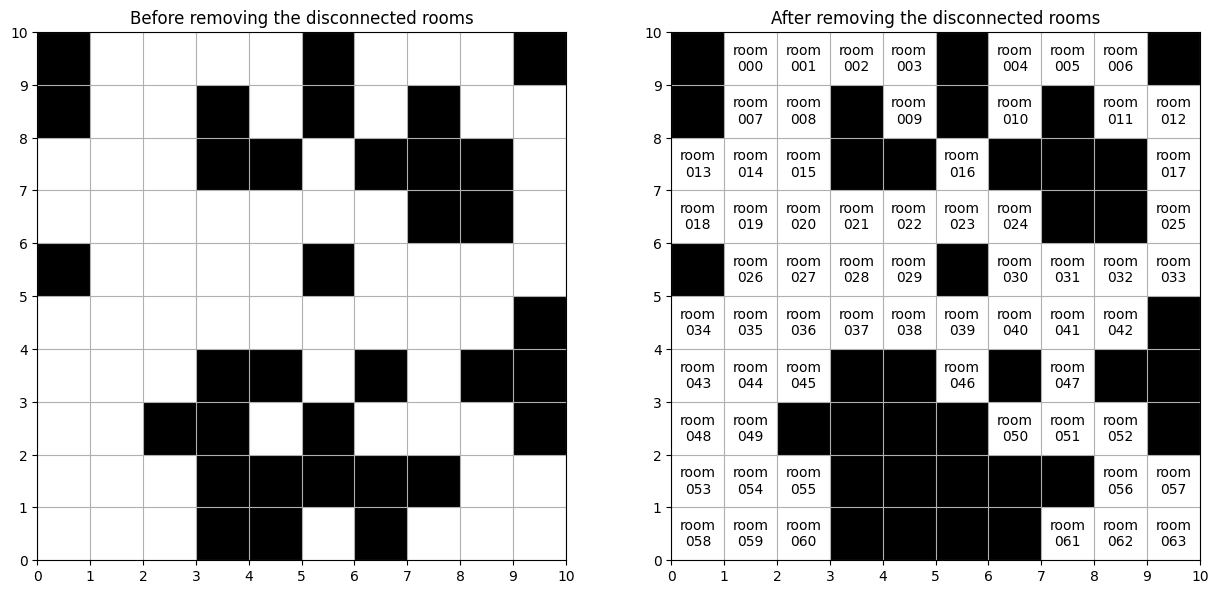

In [1]:
import random
from room_env.create_room_v2 import RoomCreator

room_creator = RoomCreator(
    filename="dev",
    grid_length=10,
    num_rooms=64,
    num_static_objects=16,
    num_independent_objects=16,
    num_dependent_objects=16,
    room_prob=0.5,
    minimum_transition_stay_prob=0.6,
    static_object_in_every_room=False,
    give_fake_names=False,
    same_question_probs=True,
)
room_creator.run()

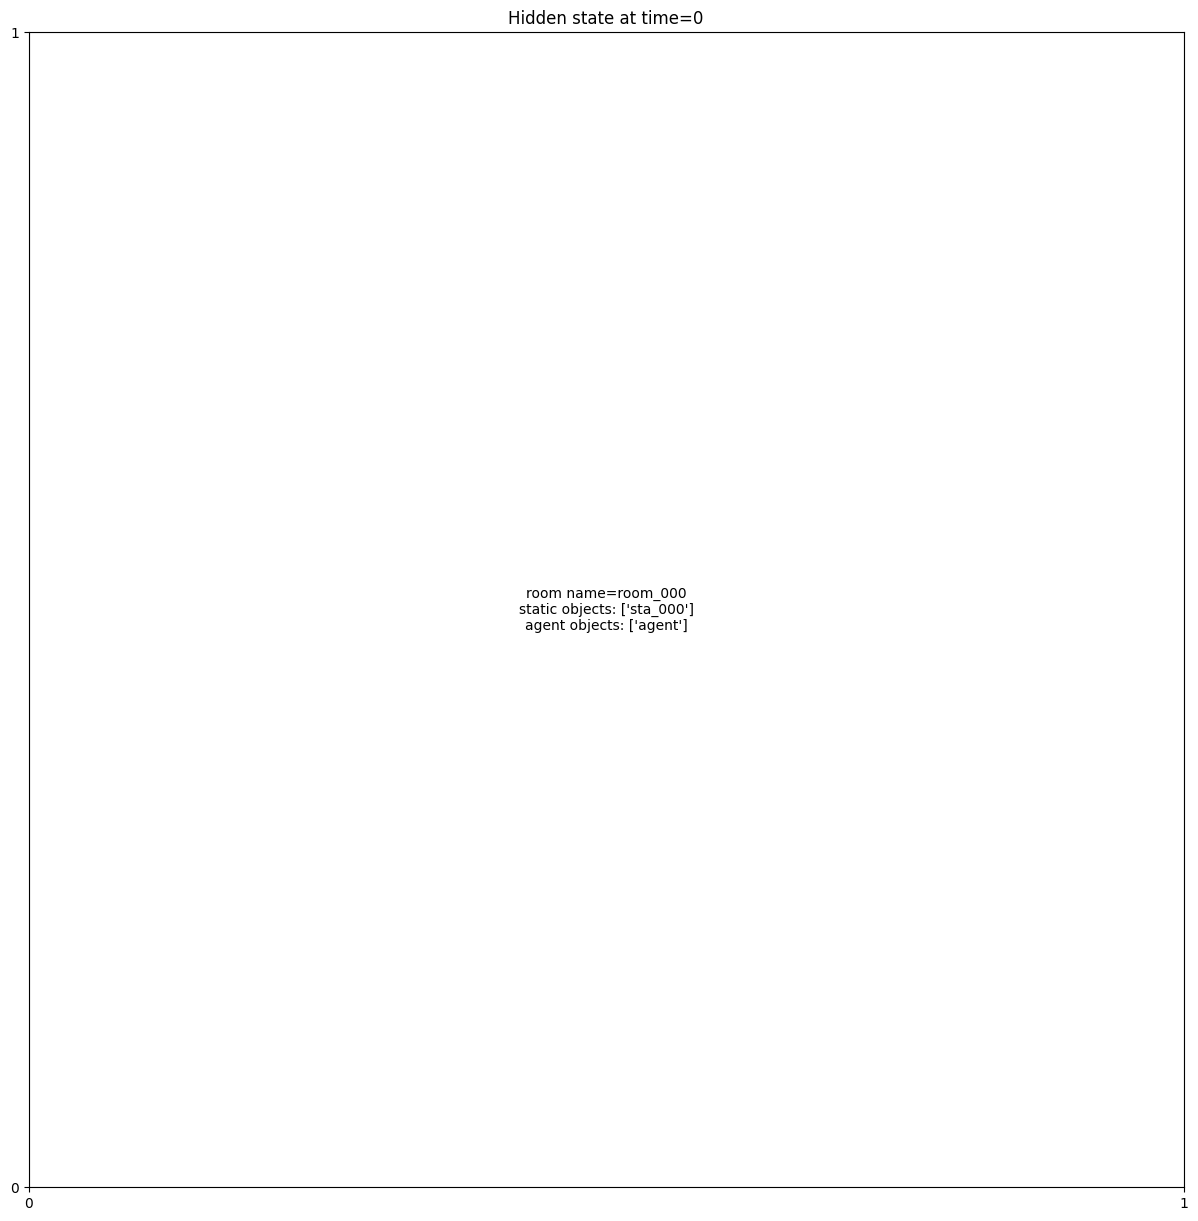

The number of room: 1
The number of static_objects: 1
The number of independent_objects: 0
The number of dependent_objects: 0


In [185]:
from room_env.envs.room2 import RoomEnv2

env_config = {
    "question_prob": 1.0,
    "seed": 0,
    "terminates_at": 99,
    "randomize_observations": "all",
    "room_size": "xxs",
}

env = RoomEnv2(**env_config)
observations, info = env.reset()
env.render("image", save_fig_dir="./DEBUG/")
for key, val in env.names.items():
    print(f"The number of {key}: {len(val)}")

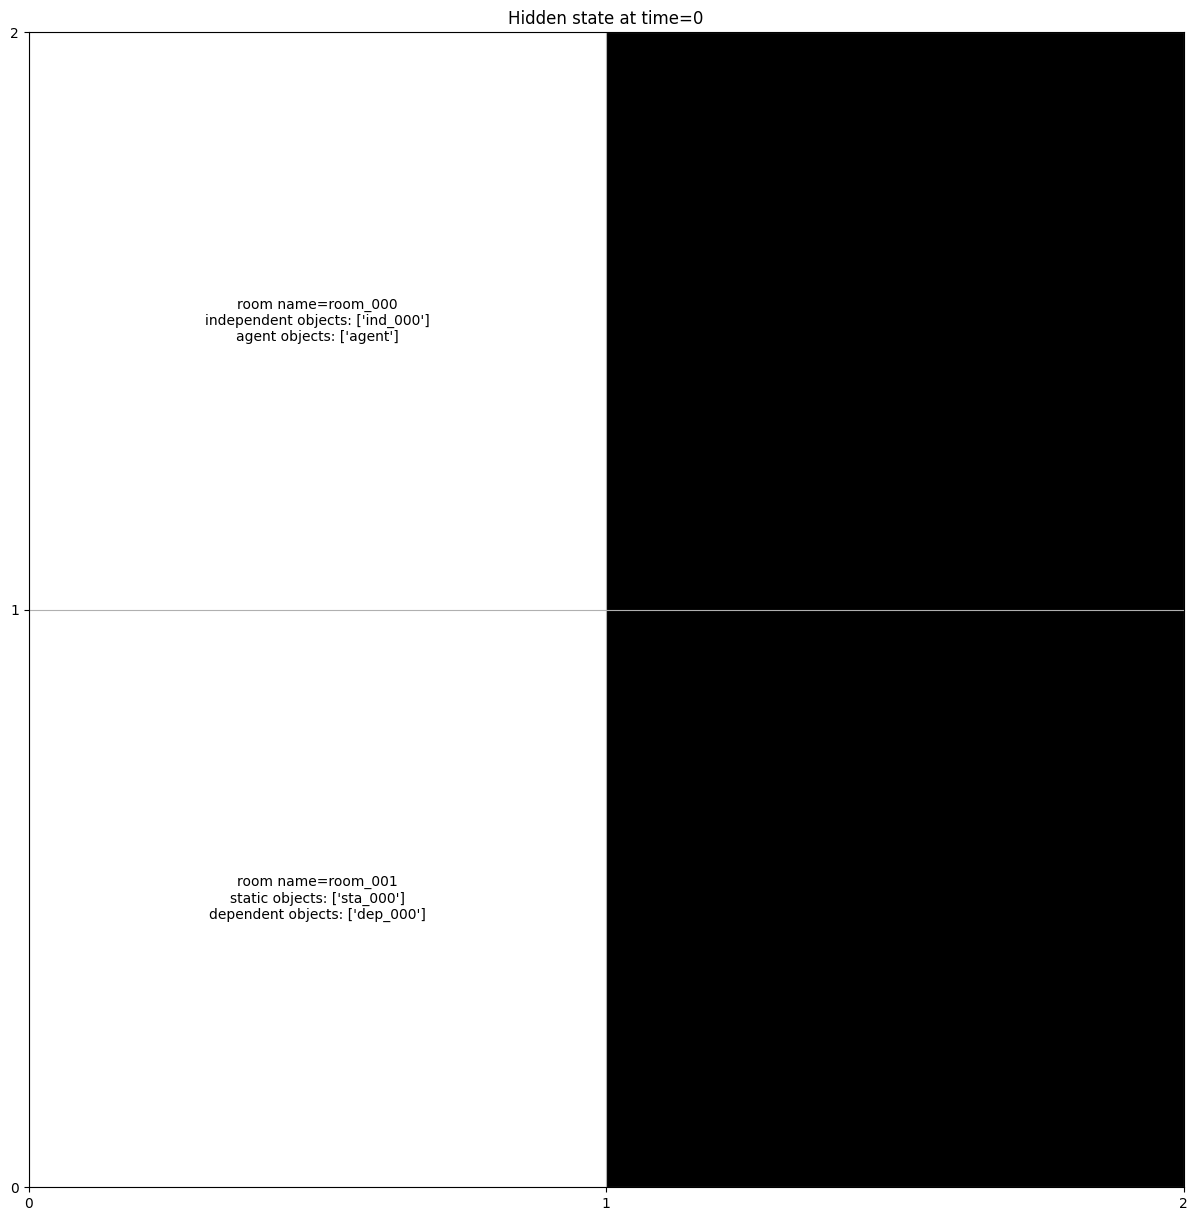

The number of room: 2
The number of static_objects: 1
The number of independent_objects: 1
The number of dependent_objects: 1


In [7]:
from room_env.envs.room2 import RoomEnv2

env_config = {
    "question_prob": 1.0,
    "seed": 2,
    "terminates_at": 99,
    "randomize_observations": "all",
    "room_size": "xs",
}

env = RoomEnv2(**env_config)
observations, info = env.reset()
env.render("image", save_fig_dir="./DEBUG/")
for key, val in env.names.items():
    print(f"The number of {key}: {len(val)}")

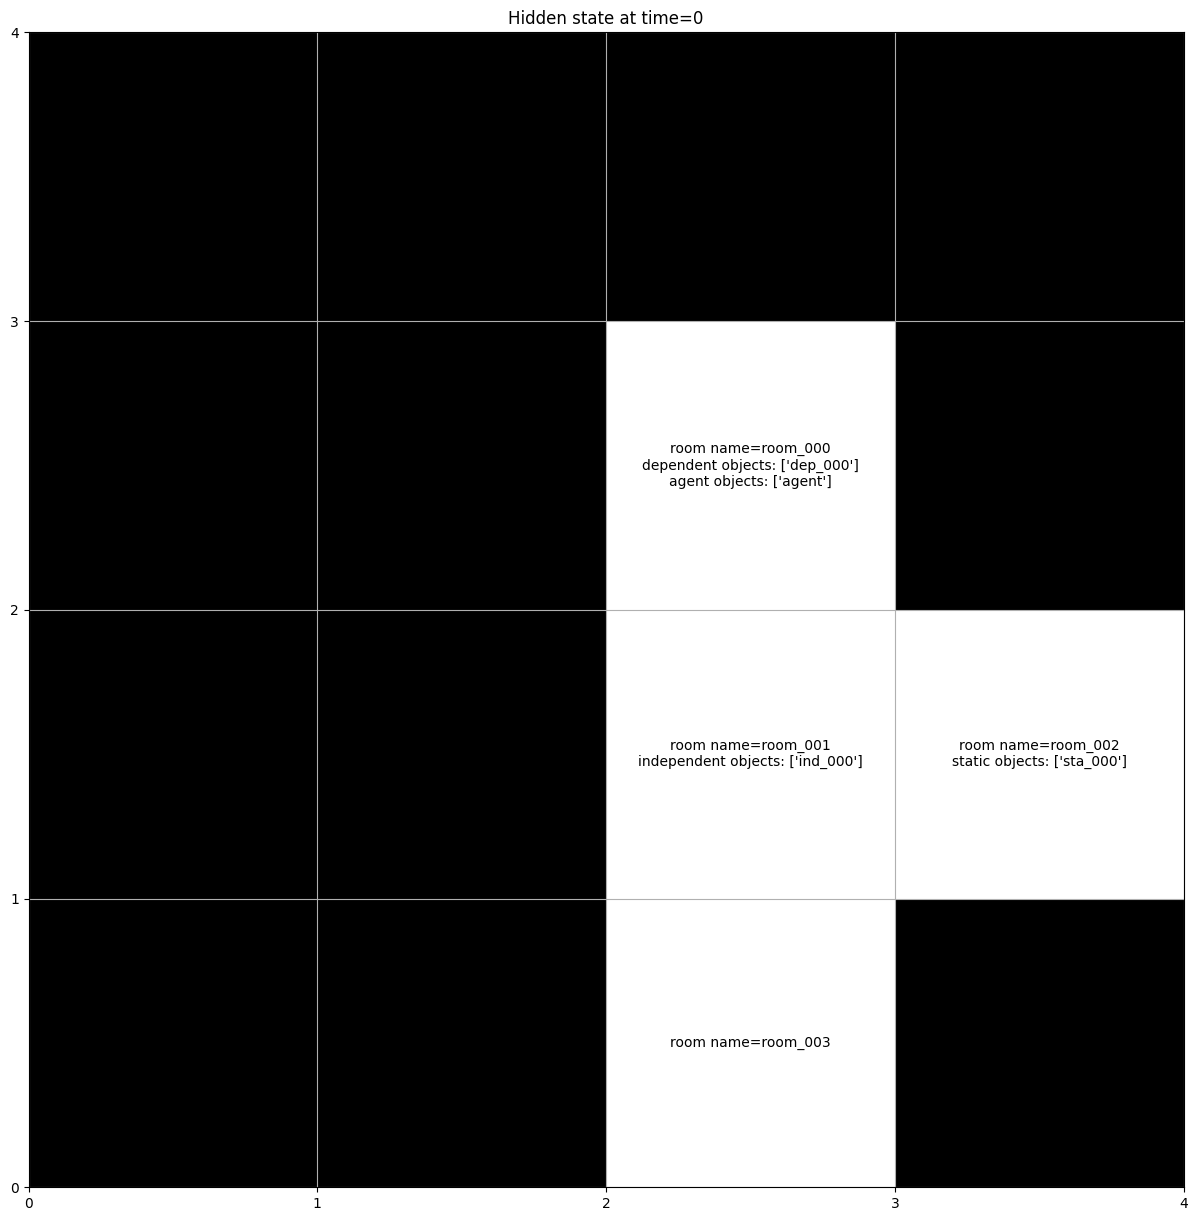

The number of room: 4
The number of static_objects: 1
The number of independent_objects: 1
The number of dependent_objects: 1


In [2]:
from room_env.envs.room2 import RoomEnv2

env_config = {
    "question_prob": 1.0,
    "seed": 0,
    "terminates_at": 99,
    "randomize_observations": "none",
    "room_size": "s",
    "make_everything_static": False,
    "rewards": {"correct": 1, "wrong": -1, "partial": -1},
    "num_total_questions": 100,
    "question_interval": 1,
    "include_walls_in_observations": True,
}

env = RoomEnv2(**env_config)
observations, info = env.reset()
env.render("image", save_fig_dir="./DEBUG/")
for key, val in env.names.items():
    print(f"The number of {key}: {len(val)}")

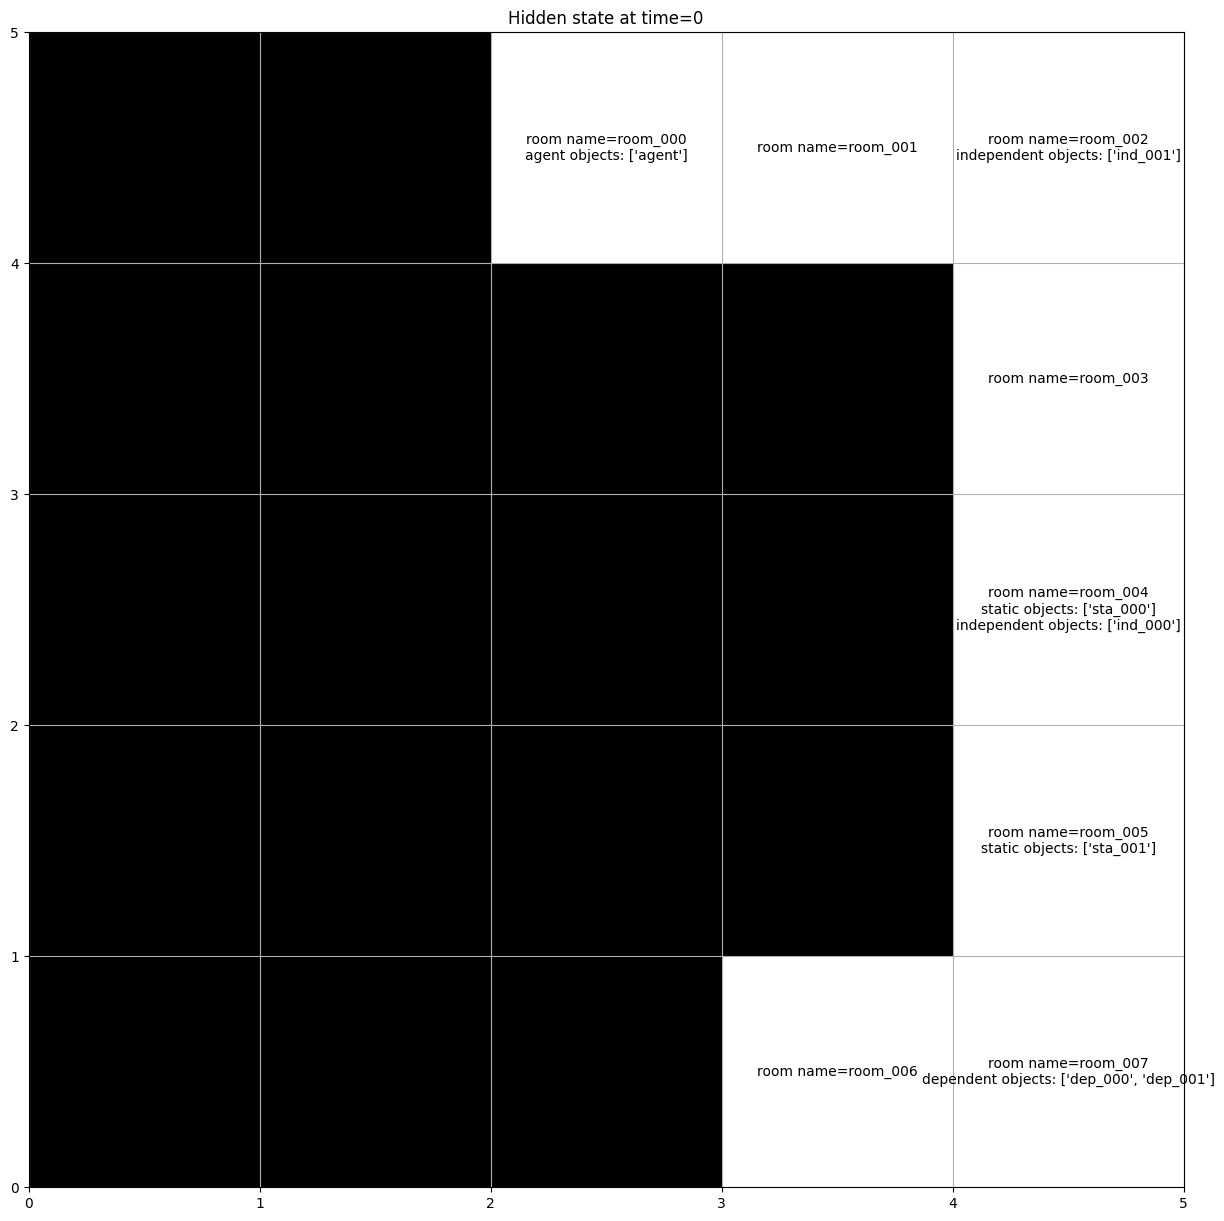

The number of room: 8
The number of static_objects: 2
The number of independent_objects: 2
The number of dependent_objects: 2


In [25]:
from room_env.envs.room2 import RoomEnv2

env_config = {
    "question_prob": 1.0,
    "seed": 0,
    "terminates_at": 99,
    "randomize_observations": "none",
    "room_size": "m",
    "make_everything_static": False,
    "rewards": {"correct": 1, "wrong": -1, "partial": -1},
    "num_total_questions": 100,
    "question_interval": 1,
    "include_walls_in_observations": True,
}

env = RoomEnv2(**env_config)
observations, info = env.reset()
env.render("image", save_fig_dir="./DEBUG/")
for key, val in env.names.items():
    print(f"The number of {key}: {len(val)}")

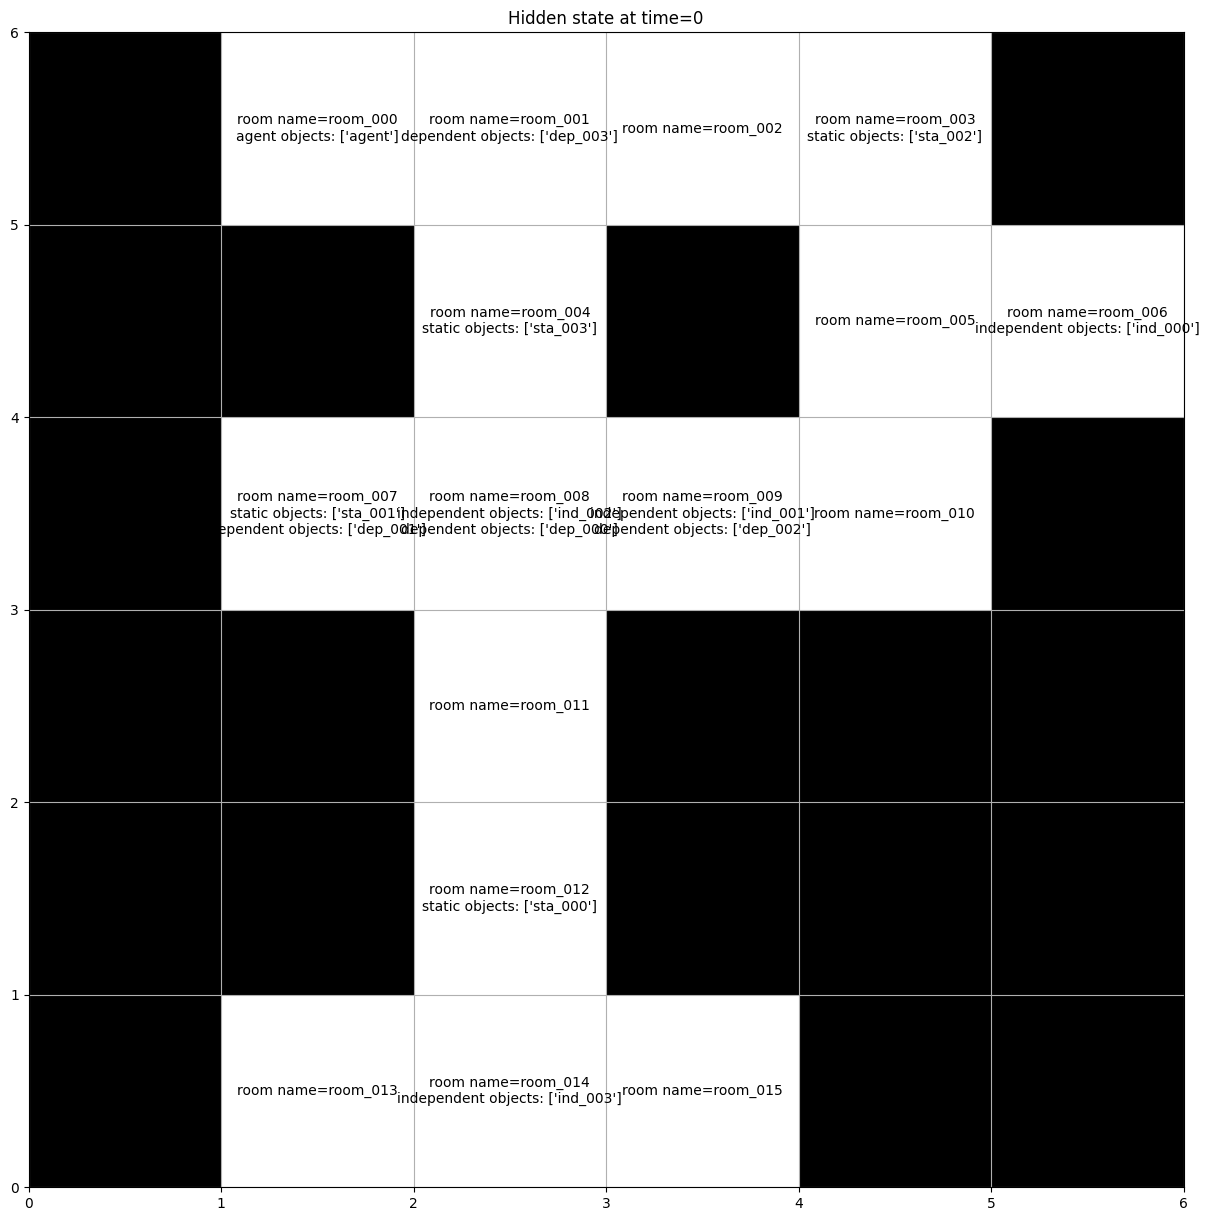

The number of room: 16
The number of static_objects: 4
The number of independent_objects: 4
The number of dependent_objects: 4


In [12]:
from room_env.envs.room2 import RoomEnv2

env_config = {
    "question_prob": 1.0,
    "seed": 0,
    "terminates_at": 99,
    "randomize_observations": "objects",
    "room_size": "l",
    "make_everything_static": False,
    "rewards": {"correct": 1, "wrong": 0, "partial": 0},
    "num_total_questions": 1000,
    "question_interval": 1,
    "include_walls_in_observations": True,
}

env = RoomEnv2(**env_config)
observations, info = env.reset()
env.render("image", save_fig_dir="./DEBUG/")
for key, val in env.names.items():
    print(f"The number of {key}: {len(val)}")

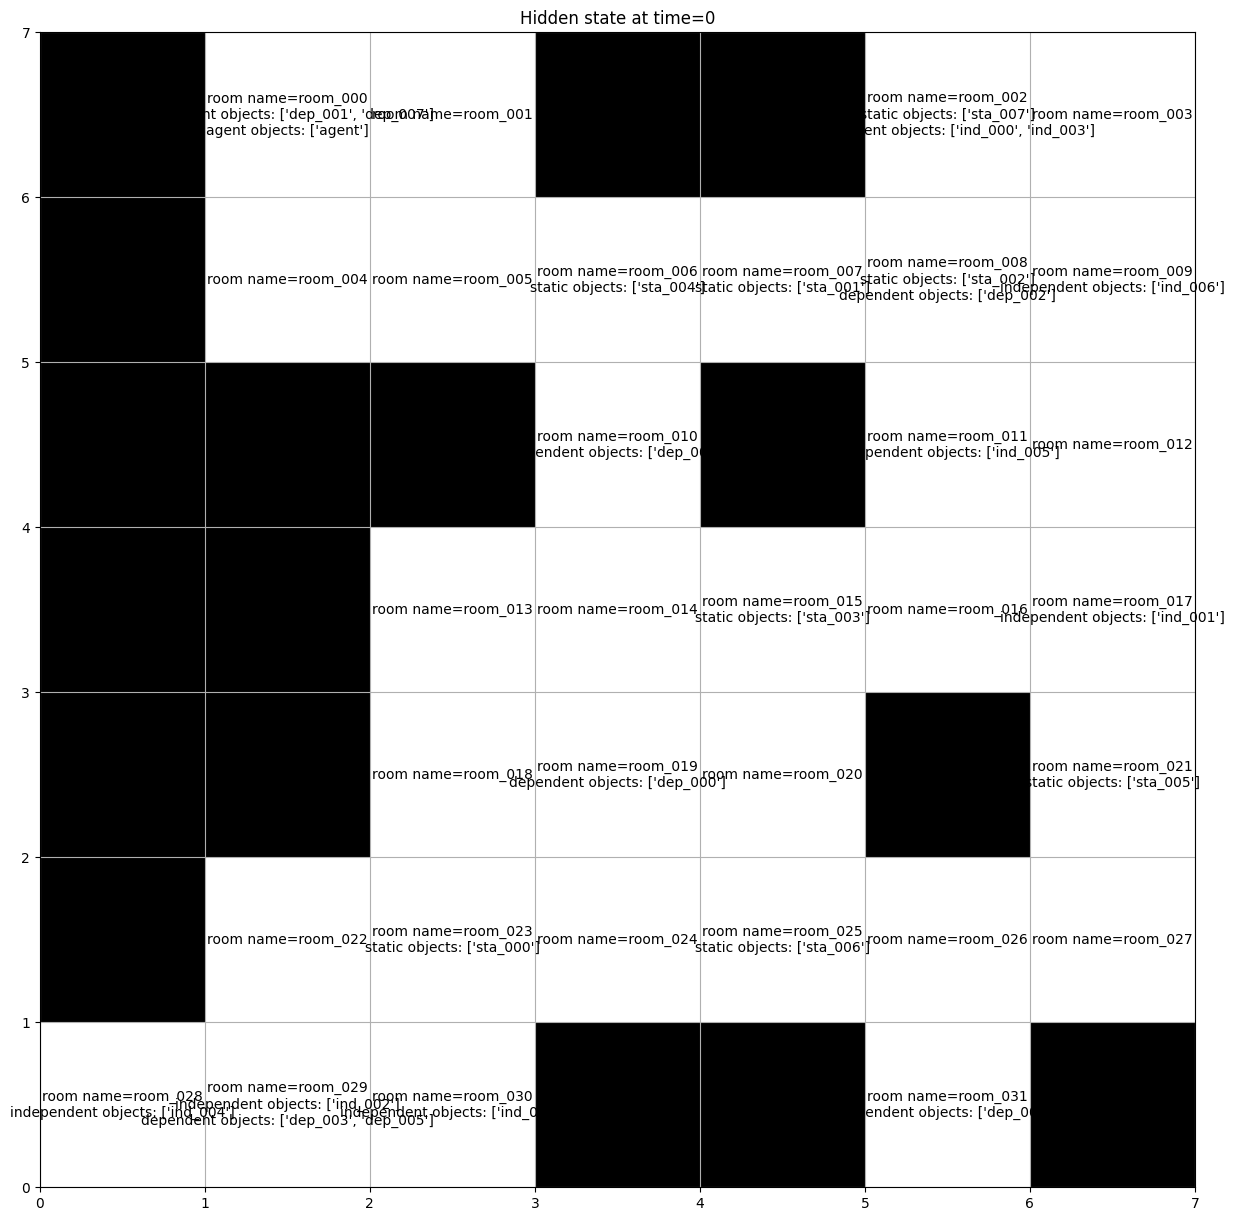

The number of room: 32
The number of static_objects: 8
The number of independent_objects: 8
The number of dependent_objects: 8


In [38]:
from room_env.envs.room2 import RoomEnv2

env_config = {
    "question_prob": 1.0,
    "seed": 0,
    "terminates_at": 99,
    "randomize_observations": "none",
    "room_size": "xl",
    "make_everything_static": False,
    "rewards": {"correct": 1, "wrong": -1, "partial": -1},
    "num_total_questions": 100,
    "question_interval": 1,
    "include_walls_in_observations": True,
}

env = RoomEnv2(**env_config)
observations, info = env.reset()
env.render("image", save_fig_dir="./DEBUG/")
for key, val in env.names.items():
    print(f"The number of {key}: {len(val)}")

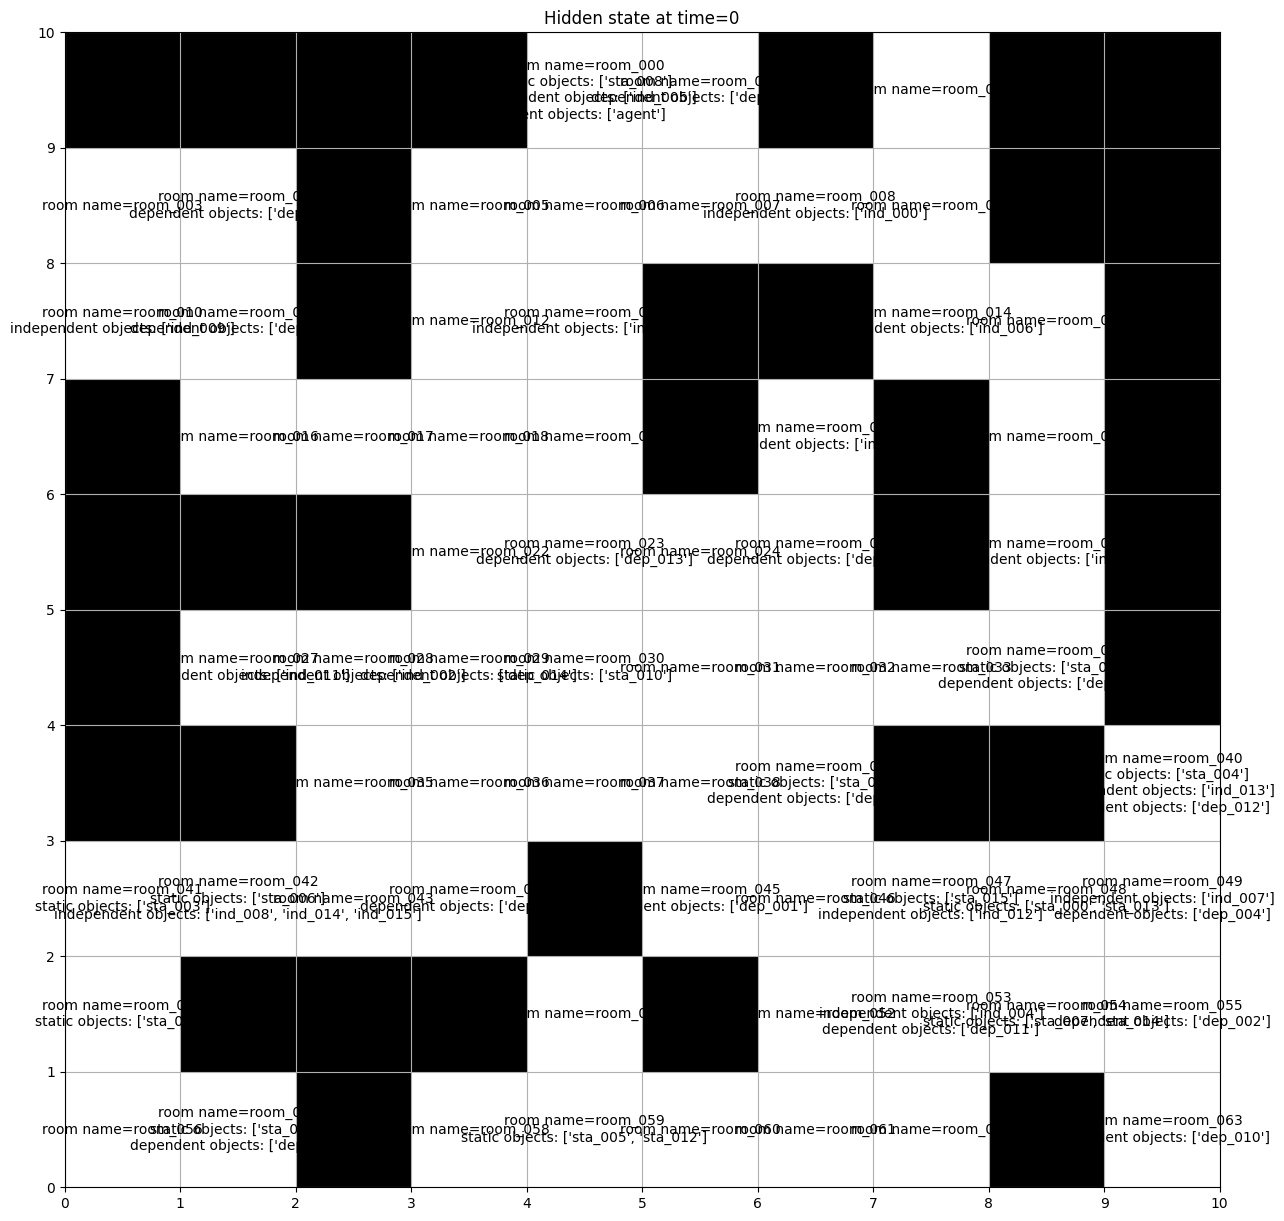

The number of room: 64
The number of static_objects: 16
The number of independent_objects: 16
The number of dependent_objects: 16


In [2]:
from room_env.envs.room2 import RoomEnv2

env_config = {
    "question_prob": 1.0,
    "seed": 0,
    "terminates_at": 99,
    "randomize_observations": "none",
    "room_size": "xxl",
    "make_everything_static": False,
    "rewards": {"correct": 1, "wrong": -1, "partial": -1},
    "num_total_questions": 100,
    "question_interval": 1,
    "include_walls_in_observations": True,
}

env = RoomEnv2(**env_config)
observations, info = env.reset()
env.render("image", save_fig_dir="./DEBUG/")
for key, val in env.names.items():
    print(f"The number of {key}: {len(val)}")

In [ ]:
import gymnasium as gym
import random

env = gym.make("room_env:RoomEnv-v2", room_size="l")
observations, info = env.reset()
rewards = 0

while True:
    observations, reward, done, truncated, info = env.step(
        (
            ["random answer"] * len(observations["questions"]),
            random.choice(["north", "east", "south", "west", "stay"]),
        )
    )
    rewards += reward
    if done or truncated:
        break

room_layout = env.unwrapped.return_room_layout(exclude_walls=True)